In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
lena=cv2.imread('./lena.jpg')
hist=cv2.calcHist([lena],[0],None,[255],[0,256])
hist.shape

(255, 1)

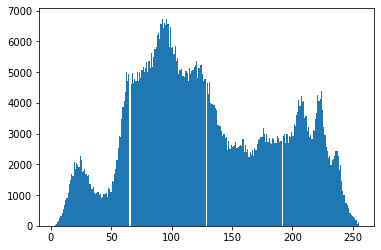

In [2]:
plt.hist(lena.ravel(),256)
plt.show()

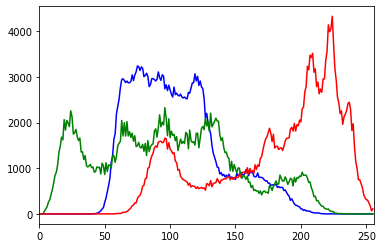

In [3]:
color=('b','g','r')
for i,col in enumerate(color):
    histr=cv2.calcHist([lena],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

In [4]:
lena.shape

(512, 512, 3)

In [5]:
mask = np.zeros(lena.shape[:2], np.uint8)
mask[100:412, 100:412] = 255
cv2.imshow('mask', mask)
key = cv2.waitKey(0)
if key == ord('q'):
    cv2.destroyAllWindows()

In [6]:
masked_lena = cv2.bitwise_and(lena, lena, mask=mask)
cv2.imshow('masked_lena', masked_lena)
key = cv2.waitKey(0)
if key == ord('q'):
    cv2.destroyAllWindows()

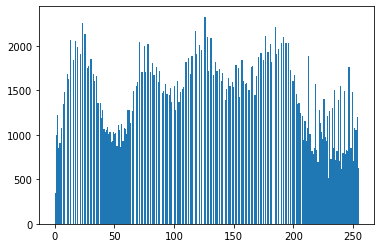

In [7]:
b, g, r = cv2.split(lena)
equ = cv2.equalizeHist(g)  # g:uint8
plt.hist(equ.ravel(), 256)
plt.show()

In [8]:
res=np.hstack((g,equ))
cv2.imshow('res', res)
key = cv2.waitKey(0)
if key == ord('q'):
    cv2.destroyAllWindows()

In [ ]:
clahe=cv2.createCLAHE(clipLimit=2.0,tileGridSize=(4,4))
res_clahe=clahe.apply(g)
res1=np.hstack((g,equ,res_clahe))
cv2.imshow('res1', res1)
key = cv2.waitKey(0)
if key == ord('q'):
    cv2.destroyAllWindows()